<a href="https://colab.research.google.com/github/Dineth14/ME210_labs-/blob/main/VCR_LAB_E_21_291.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gradient (slope): 3.18 ltr/min
Intercept: 6000.40 ltr
Equation of the line: y = 3.18x + 6000.40


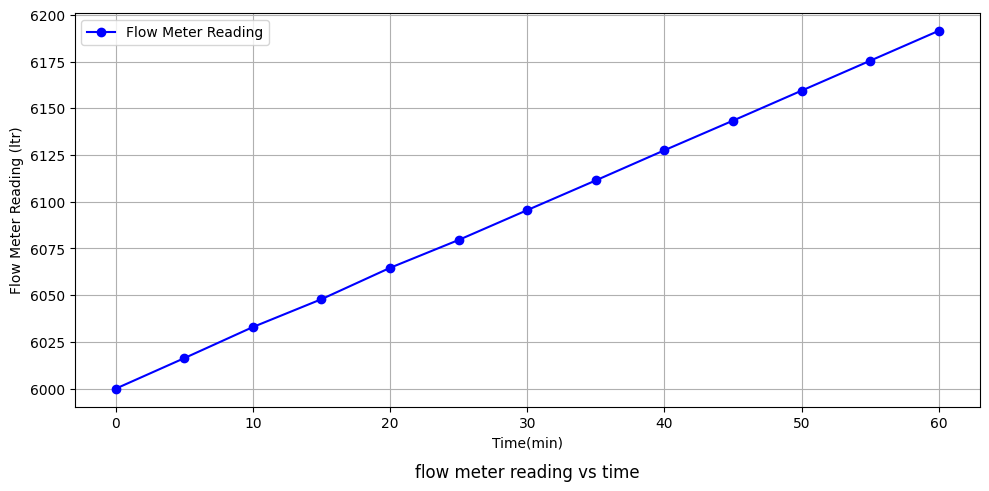

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Given data
x = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])
y = np.array([6000.00, 6016.33, 6032.97, 6047.88, 6064.65, 6079.56,
              6095.53, 6111.43, 6127.55, 6143.40, 6159.44, 6175.45, 6191.46])

# Plotting the values
plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o', linestyle='-', color='blue')
plt.xlabel("Time(min)")
plt.ylabel("Flow Meter Reading (ltr)")
plt.legend(["Flow Meter Reading"])
plt.title("flow meter reading vs time",y=-0.2)
plt.grid(True)
plt.tight_layout()

# gradient (slope) using linear regression (least squares fit)
slope, intercept = np.polyfit(x, y, 1)
print(f"Gradient (slope): {slope:.2f} ltr/min")
print(f"Intercept: {intercept:.2f} ltr")
print(f"Equation of the line: y = {slope:.2f}x + {intercept:.2f}")

In [ ]:
pip install CoolProp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 52.2 MB/s eta 0:00:00


In [ ]:
from CoolProp.CoolProp import PropsSI

def calculate_enthalpy(temperature_celsius, pressure_kpa, fluid_name):

  # Convert units to SI
  temperature_kelvin = temperature_celsius + 273.15
  pressure_pascal = pressure_kpa * 1000

  # Get enthalpy in J/kg
  enthalpy_j_per_kg = PropsSI("H", "T", temperature_kelvin, "P", pressure_pascal, fluid_name)

  # Convert to kJ/kg
  enthalpy_kj_per_kg = enthalpy_j_per_kg / 1000

  return f"{enthalpy_kj_per_kg:.2f}"

T1_C = 23
P1_kPa = 144.825
fluid = "R134a"

T2_C = 75
P2_kPa = 830.61
fluid = "R134a"

enthalpy_value_h1 = calculate_enthalpy(T1_C, P1_kPa, fluid)
print(f"enthalpy value h1 = {enthalpy_value_h1} kJ/kg")

enthalpy_value_h2 = calculate_enthalpy(T2_C, P2_kPa, fluid)
print(f"enthalpy value h2 = {enthalpy_value_h2} kJ/kg")

enthalpy value h1 = 422.00 kJ/kg
enthalpy value h2 = 459.64 kJ/kg


In [ ]:
from CoolProp.CoolProp import PropsSI

def calculate_enthalpy_from_pressure(P_given_kPa, h2, Cp, delta_T1):
    # Convert input units
    P_Pa = P_given_kPa * 1000

    # Step 1: Get saturation temperature at given pressure
    T_sat_K = PropsSI('T', 'P', P_Pa, 'Q', 0.5, 'R134a')
    T_sat_C = T_sat_K - 273.15

    # Step 2: Get latent heat h_fg = h_g - h_f
    h_fg = (PropsSI('H', 'P', P_Pa, 'Q', 1, 'R134a') -
            PropsSI('H', 'P', P_Pa, 'Q', 0, 'R134a')) / 1000  # Convert to kJ/kg

    # Step 3: Calculate h3 using energy balance
    h3 = h2 - Cp * delta_T1 - h_fg

    # Step 4: Assume isenthalpic expansion, so h4 = h3
    h4 = h3

    # step-by-step explanation
    print(f"Consider the input values,\n\nGiven Pressure = {P_given_kPa} kPa")
    print("\nCalculation of the condenser temperature")
    print("\nFrom property table of the refrigerant R134a,")
    print("By CoolProp,")
    print(f"T_sat = {T_sat_C:.2f} °C")
    print(f"h_fg = {h_fg:.2f} kJ/kg")
    print("\nCalculation of h₃")
    print("Considering energy balance,")
    print("h₃ = h₂ - Cp·ΔT₁ - h_fg")
    print(f"    = {h2} kJ/kg - {Cp} kJ/kg·K × {delta_T1}K - {h_fg:.2f} kJ/kg")
    print(f"\n⇒ h₃ = {h3:.2f} kJ/kg")
    print("\nAssuming the expansion valve works as an isenthalpic process,")
    print(f"⇒ h₄ = {h4:.2f} kJ/kg")

# :input
P_input_kPa = 830.61    # kPa
h2 = 459.64             # kJ/kg
Cp = 0.8509             # kJ/kg.K
delta_T1 = 46           # K

calculate_enthalpy_from_pressure(P_input_kPa, h2, Cp, delta_T1)



Consider the input values,

Given Pressure = 830.61 kPa

Calculation of the condenser temperature

From property table of the refrigerant R134a,
By CoolProp,
T_sat = 32.65 °C
h_fg = 170.52 kJ/kg

Calculation of h₃
Considering energy balance,
h₃ = h₂ - Cp·ΔT₁ - h_fg
    = 459.64 kJ/kg - 0.8509 kJ/kg·K × 46K - 170.52 kJ/kg

⇒ h₃ = 249.98 kJ/kg

Assuming the expansion valve works as an isenthalpic process,
⇒ h₄ = 249.98 kJ/kg


In [ ]:
def calculate_performance_metrics(h1, h2, h3, h4, G_R, W, T_surround, T_evap):
    # Step e: Efficiency of compressor
    print("e. Calculate the efficiency of the compressor (η)\n")

    numerator = G_R * (h2 - h1) * 100
    efficiency_percent = numerator / W

    print("η% = [G_R × (h₂ − h₁)] × 100% / W")
    print(f"   = {G_R} × ( {h2} − {h1} ) kJ/kg × 100% / {W:.3f} kJ/s")
    print(f"   = {efficiency_percent:.3f} %\n")

    # Step f: Refrigerant effect (Q₀)
    print("f. Calculate the refrigerant effect (Q₀).\n")

    Q0 = G_R * (h1 - h4)  # in kW

    print("Q₀ = G_R × (h₁ − h₄)")
    print(f"   = {G_R} × ( {h1} − {h4} ) kJ/kg")
    print(f"   = {Q0:.5f} kW\n")

    # Step g: Coefficient of Performance (COP)
    print("g. Calculate the coefficient of performance. (COP)\n")

    COP = (h1 - h3) / (h2 - h1)

    print("COP = (h₁ − h₃) / (h₂ − h₁)")
    print(f"    = ( {h1} − {h3} ) / ( {h2} − {h1} )")
    print(f"    = {COP:.2f}\n")

    # Step h: Temperature difference (ΔT₂)
    print("h. Calculate the temperature difference between the evaporator chamber & the surrounding. (ΔT₂)\n")

    delta_T2 = T_surround - T_evap

    print("ΔT₂ = T_surrounding − T_v")
    print(f"    = {T_surround} − {T_evap} °C")
    print(f"    = {delta_T2:.2f} °C")

# === Data  ===
h1 = 422.00     # kJ/kg
h2 = 459.64      # kJ/kg
h3 = 249.98      # kJ/kg
h4 = 249.98    # kJ/kg
G_R = 2.25e-4    # kg/s
W = 0.828        # kJ/s
T_surround = 28  # °C
T_evap = 23.2      # °C

calculate_performance_metrics(h1, h2, h3, h4, G_R, W, T_surround, T_evap)


e. Calculate the efficiency of the compressor (η)

η% = [G_R × (h₂ − h₁)] × 100% / W
   = 0.000225 × ( 459.64 − 422.0 ) kJ/kg × 100% / 0.828 kJ/s
   = 1.023 %

f. Calculate the refrigerant effect (Q₀).

Q₀ = G_R × (h₁ − h₄)
   = 0.000225 × ( 422.0 − 249.98 ) kJ/kg
   = 0.03870 kW

g. Calculate the coefficient of performance. (COP)

COP = (h₁ − h₃) / (h₂ − h₁)
    = ( 422.0 − 249.98 ) / ( 459.64 − 422.0 )
    = 4.57

h. Calculate the temperature difference between the evaporator chamber & the surrounding. (ΔT₂)

ΔT₂ = T_surrounding − T_v
    = 28 − 23.2 °C
    = 4.80 °C
